<a href="https://colab.research.google.com/github/melinashk/ai-health-project/blob/main/Artificial_Intelligence_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 19.7 MB/s 
     |████████████████████████████████| 212 kB 78.8 MB/s 


In [8]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6dfed609866e5bcd4e25838f6e43733a1f84c4652ff0f7319353277cd99c4bda
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [40]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
#importing different python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
#stopwords identification
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
#loading datasets
df = pd.read_csv('/Data.csv')

In [12]:
df.head()

,Age,Sex,Description,Dental History,Medical History,Past Medication,Department,Labels
0,11,M,fall injury on table,none,none,zytee gel,Pedodontics,3
1,21,M,pain left back region,none,none,none,OMR,1
2,26,M,deposits on teeth,none,none,none,OMR,1
3,10,M,partially erupted teeth present in upper region,none,none,none,Pedodontics,3
4,80,F,missing teeth in upper and lower region,complete denture since 5 months,cardiac disorder and hypertension,medication for hypertension and cardiac disorder,Prosthodontics,4


In [13]:
df.shape

(101, 8)

In [14]:
#counting number of missing values
df.isnull().sum()

Age                0
Sex                0
Description        0
Dental History     0
Medical History    0
Past Medication    0
Department         0
Labels             0
dtype: int64

In [15]:
df.describe()

,Age,Labels
count,101.000000,101.000000
mean,32.326733,2.336634
std,22.772839,1.589196
min,4.000000,0.000000
25%,11.000000,1.000000
50%,26.000000,3.000000
75%,51.000000,3.000000
max,80.000000,5.000000


In [16]:
#label wise counting
df['Labels'].value_counts()

3    31
1    23
0    16
4    14
5    10
2     7
Name: Labels, dtype: int64

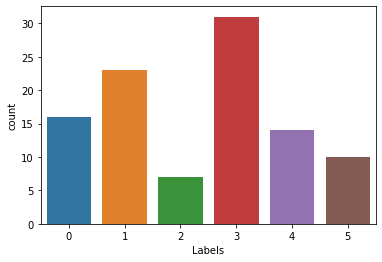

In [42]:
sns.countplot(x = 'Labels', data = df)

In [17]:
df.groupby('Labels').mean()

,Age
Labels,
0,41.000000
1,42.043478
2,21.428571
3,9.032258
4,56.500000
5,42.100000


In [18]:
#Seperating the features and target 
X = df.drop(columns= 'Labels',axis=1)
Y = df['Labels']

In [19]:
print (X)

     Age Sex                                      Description  \
0     11   M                             fall injury on table   
1     21   M                            pain left back region   
2     26   M                                deposits on teeth   
3     10   M  partially erupted teeth present in upper region   
4     80   F          missing teeth in upper and lower region   
..   ...  ..                                              ...   
96    28   F           decayed tooth in right back regionafo    
97    58   F                      upper and lower jaw paining   
98     5   M     pain in lower right back region since 1 week   
99     8   F           decayed lower left tooth since 2 years   
100   56   M          swelling in the left upper front region   

                      Dental History                    Medical History  \
0                               none                               none   
1                               none                               no

In [20]:
print (Y)

0      3
1      1
2      1
3      3
4      4
      ..
96     0
97     1
98     3
99     3
100    5
Name: Labels, Length: 101, dtype: int64


In [21]:
port_stem = PorterStemmer()

In [22]:
def stemming(Description):
    stemmed_Description = re.sub('[^a-zA-Z]',' ',Description)
    stemmed_Description = stemmed_Description.lower()
    stemmed_Description = stemmed_Description.split()
    stemmed_Description = [port_stem.stem(word) for word in stemmed_Description if not word in stopwords.words('english')]
    stemmed_Description = ' '.join(stemmed_Description)
    return stemmed_Description

In [23]:
df['Description'] = df['Description'].apply(stemming)

In [24]:
print (df['Description'])

0                              fall injuri tabl
1                         pain left back region
2                                 deposit teeth
3      partial erupt teeth present upper region
4                 miss teeth upper lower region
                         ...                   
96             decay tooth right back regionafo
97                         upper lower jaw pain
98       pain lower right back region sinc week
99             decay lower left tooth sinc year
100               swell left upper front region
Name: Description, Length: 101, dtype: object


In [25]:
#Seperating data and label
X = df['Description'].values
Y = df['Labels'].values

In [26]:
print(X)

['fall injuri tabl' 'pain left back region' 'deposit teeth'
 'partial erupt teeth present upper region'
 'miss teeth upper lower region' 'decay teeth upper back region'
 'pain lower right back region jaw day'
 'multipl miss teeth upper lower region mouth'
 'delay tooth upper front region' 'decay teeth left back region lower jaw'
 'decay teeth' 'irregular arrang upper lower front teeth'
 'irregular arrang upper front teeth' 'pain gum sinc year'
 'decay tooth upper left region' 'placement artifici teeth'
 'irregular arrang upper lower front teeth' 'artifici teeth place'
 'decay teeth' 'wound corner right region'
 'pain lower left region mouth month' 'fall injuri' 'deposit teeth'
 'replac miss teeth' 'mobil tooth right front region lower jaw'
 'swell present lower surfac tongu day'
 'decay tooth left lower back region' 'bleed gum month'
 'fractur fragment lower left region' 'upper complet dentur fell'
 'teeth need scale' 'pain left back region lower jaw sinc day'
 'sensit teeth sinc year'

In [27]:
print(Y)

[3 1 1 3 4 1 3 4 3 0 0 2 2 5 3 4 2 4 0 1 1 3 1 4 3 3 3 5 3 4 5 1 5 3 1 5 2
 4 4 2 0 0 3 5 1 0 4 3 3 3 0 0 1 3 1 3 4 1 1 0 0 3 0 5 3 3 1 3 0 1 2 3 5 4
 0 3 4 3 1 1 1 4 3 1 0 5 3 3 0 1 2 4 1 3 3 1 0 1 3 3 5]


In [28]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [29]:
print(X)

  (0, 54)	0.6103165810080543
  (0, 22)	0.5601400141690643
  (0, 15)	0.5601400141690643
  (1, 42)	0.37853217558060337
  (1, 35)	0.5437116170416159
  (1, 25)	0.5680583861221443
  (1, 3)	0.48826298190679107
  (2, 55)	0.4111335307374386
  (2, 12)	0.9115751312444672
  (3, 59)	0.21951705448302253
  (3, 55)	0.2464562487877183
  (3, 42)	0.17889615861984368
  (3, 40)	0.5117180476221626
  (3, 37)	0.5464487095754779
  (3, 14)	0.5464487095754779
  (4, 59)	0.3690922022895724
  (4, 55)	0.41438730055536965
  (4, 42)	0.3007929261881085
  (4, 29)	0.6743994051422116
  (4, 28)	0.3830968144562068
  (5, 59)	0.4159207144425609
  (5, 55)	0.46696262081335993
  (5, 42)	0.3389559789758827
  (5, 9)	0.5503711690456273
  (5, 3)	0.4372142388584326
  :	:
  (96, 43)	0.7257876119090598
  (96, 9)	0.3540910643021702
  (96, 3)	0.28128954398883343
  (97, 59)	0.4278998634735608
  (97, 35)	0.500888093128655
  (97, 28)	0.4441358381078922
  (97, 24)	0.6072529804862616
  (98, 60)	0.5832588645674408
  (98, 51)	0.434016621807012

In [30]:
#Splitting data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(101, 63) (80, 63) (21, 63)


In [33]:
#training using logistic regression
model = LogisticRegression()

In [34]:
model.fit(X_train, Y_train)

LogisticRegression()

In [35]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [36]:
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.8875


In [37]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [38]:
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.5714285714285714


In [69]:
X_new = X_test[19]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('Cons and Endo')
elif(prediction[0]==1):
  print('OMR')
elif(prediction[0]==2):
  print('Ortho')
elif(prediction[0]==3):
  print('pedo')
elif(prediction[0]==4):
  print('prostho')
elif(prediction[0]==5):
  print('poi')
else:
  print('not detected')

[0]
Cons and Endo


In [70]:
print(Y_test[19])

3
